In [1]:
#Blood cell subtype classification

import pandas as pd
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [2]:
#TRAIN AND TEST DATASET ADDRESS
DATASET=".\dataset2-master\images\TRAIN"
TEST_DATASET=".\dataset2-master\images\TEST"

#Categroized images
#4 types of subcells
CATEGORIES=["EOSINOPHIL","LYMPHOCYTE","MONOCYTE","NEUTROPHIL"]


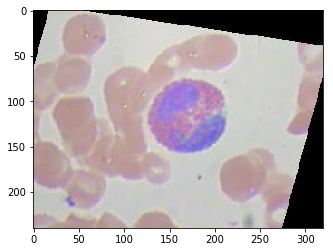

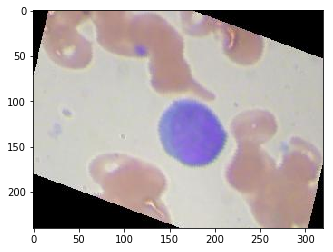

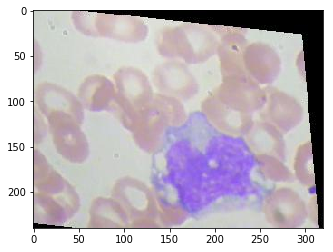

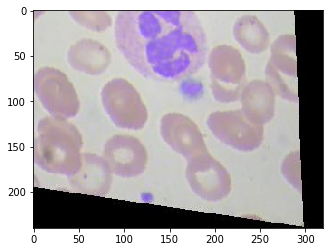

In [3]:
#reading original image from directory
for category in CATEGORIES:
        label=CATEGORIES.index(category)
        path=os.path.join(DATASET,category)
        
        for img_file in os.listdir(path):
            
            # 1 indicates read image in RGB scale
            # 0 indicates read image in grey scale
            
            img=cv.imread(os.path.join(path,img_file),1)
            
            #open cv read image in BGR format 
            #below we convert it to RGB format
            img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
            #print(img.shape)
            plt.imshow(img)
            plt.show()
            break
            
        #plotting single image from each folder

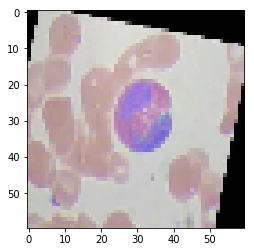

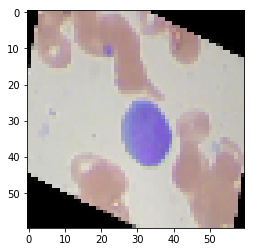

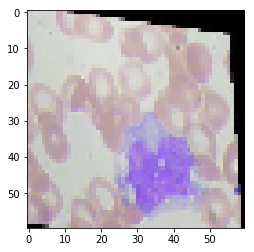

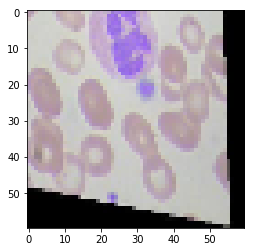

In [30]:
#reading image from directory
for category in CATEGORIES:
        label=CATEGORIES.index(category)
        path=os.path.join(DATASET,category)
        
        for img_file in os.listdir(path):
            
            # 1 indicates read image in RGB scale
            # 0 indicates read image in grey scale
            
            img=cv.imread(os.path.join(path,img_file),1)
            img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
            img=cv.resize(img,(60,60))             
            #image convert to smaller pixels 60*60
            #print(img.shape)
            plt.imshow(img)
            plt.show()
            break
            
        #plotting single image from each folder

In [31]:
#make train data
train_data=[]

for category in CATEGORIES:
    
        #each cateogry into unique integer
        label=CATEGORIES.index(category)
        path=os.path.join(DATASET,category)
        
        for img_file in os.listdir(path):
            
            img=cv.imread(os.path.join(path,img_file),1)
            img=cv.resize(img,(60,60))            
            train_data.append([img,label])
                        
#make test data
test_data=[]

for category in CATEGORIES:
       
        #each cateogry into unique integer
        label=CATEGORIES.index(category)
        path=os.path.join(TEST_DATASET,category)
        
        for img_file in os.listdir(path):
            
            img=cv.imread(os.path.join(path,img_file),1)
            img=cv.resize(img,(60,60))            
            test_data.append([img,label])


In [32]:
#print total data in train and test
print(len(train_data))
print(len(test_data))

9957
2487


In [33]:
#shuffle the dataset fo good result

import random

random.shuffle(train_data)
random.shuffle(test_data)

In [34]:
#check the data
for lbl in train_data[:10]:
    print(lbl[1])

3
0
0
0
0
1
2
3
3
2


In [35]:
#lets seprate the feature and target variable
train_X=[]
train_y=[]

for features,label in train_data:
    train_X.append(features)
    train_y.append(label)

len(train_X),len(train_y)

(9957, 9957)

In [36]:
#lets seprate the feature and target variable
test_X=[]
test_y=[]

for features,label in test_data:
    test_X.append(features)
    test_y.append(label)

len(test_X),len(test_y)

(2487, 2487)

In [37]:
#convert image array to numpy array
#-1 means same size
# 40*40 means height and width
# 3 for R+G+B
train_X=np.array(train_X).reshape(-1,60,60,3)
train_X=train_X/255.0
train_X.shape

#we divide the np array by 255 to close all values to 0

(9957, 60, 60, 3)

In [38]:
#convert image array to numpy array
#-1 means same size
# 40*40 means height and width
# 3 for R+G+B

test_X=np.array(test_X).reshape(-1,60,60,3)
test_X=test_X/255.0
test_X.shape

#we divide the np array by 255 to close all values to 0

(2487, 60, 60, 3)

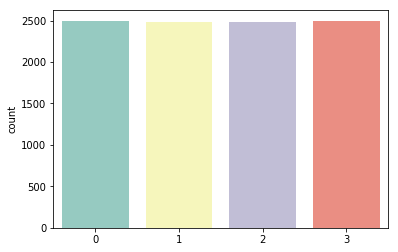

In [39]:
#count labels

sns.countplot(train_y,palette='Set3')
#we can see each categroy has equal data 

In [40]:
#convert label into the one hot encode
from keras.utils import to_categorical

#train y
one_hot_train=to_categorical(train_y)
one_hot_train

array([[0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)

In [41]:
#test_y
one_hot_test=to_categorical(test_y)
one_hot_test

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.]], dtype=float32)

In [19]:
#build the models
#import Keras libraries

In [58]:
from keras.models import Sequential
from keras.layers import Conv2D,Dense,Flatten,MaxPooling2D,Dropout,Activation

In [77]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(60,60,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.20))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.20))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.40))

model.add(Flatten())

model.add(Dense(64,activation='relu'))
model.add(Dense(128,activation='relu'))

model.add(Dense(4,activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 58, 58, 32)        896       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 29, 29, 32)        0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 29, 29, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 27, 27, 64)        18496     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
dropout_23 (Dropout)         (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 11, 11, 128)       73856     
__________

In [78]:
#we will choose adam optimizer
#we have 4 categories so loss function is categorical_crossentropy
#metrics accuracy

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [79]:
#lets split the 20% train dataset for validation 
hist=model.fit(train_X,one_hot_train,epochs=50,batch_size=128,validation_split=0.2)

Train on 7965 samples, validate on 1992 samples
Epoch 1/50
7965/7965 [==============================] - 11s 1ms/step - loss: 1.3880 - acc: 0.2510 - val_loss: 1.3867 - val_acc: 0.2385
Epoch 2/50
7965/7965 [==============================] - 9s 1ms/step - loss: 1.3761 - acc: 0.2876 - val_loss: 1.3456 - val_acc: 0.3278
Epoch 3/50
7965/7965 [==============================] - 9s 1ms/step - loss: 1.2457 - acc: 0.4104 - val_loss: 1.1386 - val_acc: 0.4704
Epoch 4/50
7965/7965 [==============================] - 9s 1ms/step - loss: 1.0881 - acc: 0.5073 - val_loss: 1.0737 - val_acc: 0.4920
Epoch 5/50
7965/7965 [==============================] - 9s 1ms/step - loss: 1.0154 - acc: 0.5440 - val_loss: 0.9562 - val_acc: 0.5387
Epoch 6/50
7965/7965 [==============================] - 9s 1ms/step - loss: 0.9416 - acc: 0.5775 - val_loss: 0.8427 - val_acc: 0.6094
Epoch 7/50
7965/7965 [==============================] - 9s 1ms/step - loss: 0.8048 - acc: 0.6389 - val_loss: 0.6895 - val_acc: 0.6958
Epoch 8/50
79

In [80]:
#model evaluation
test_loss,test_acc=model.evaluate(test_X,one_hot_test)
test_loss,test_acc

2487/2487 [==============================] - 1s 535us/step


(0.5711441559632428, 0.8061921992693074)

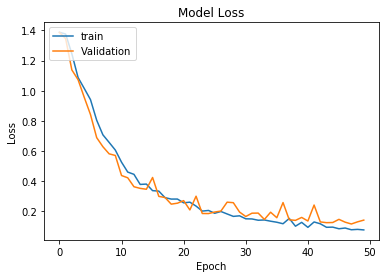

In [81]:
#train and validation loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','Validation'],loc='upper left')
plt.show()

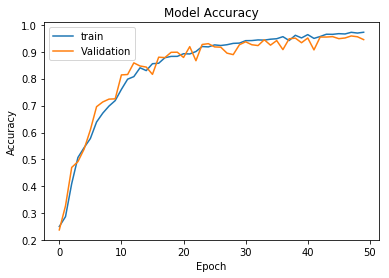

In [82]:
#train and validation accuracy
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','Validation'],loc='upper left')
plt.show()

In [83]:
#model prediction

y_pred=model.predict_classes(test_X)
y_pred

array([2, 2, 0, ..., 3, 3, 3], dtype=int64)

In [87]:
for i in range(10):
	print("Actual=%s, Predicted=%s" % (test_y[i], y_pred[i]))

Actual=2, Predicted=2
Actual=2, Predicted=2
Actual=0, Predicted=0
Actual=1, Predicted=1
Actual=0, Predicted=0
Actual=2, Predicted=2
Actual=1, Predicted=1
Actual=1, Predicted=1
Actual=0, Predicted=0
Actual=1, Predicted=1


In [85]:
#accuracy_score
from sklearn.metrics import accuracy_score
accuracy_score(test_y,y_pred)

0.8061921994370728